<a href="https://colab.research.google.com/github/Mrinal-Shankar/Dog-Identification/blob/master/Dog_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Colab Notebook

In [0]:
import pandas as pd

In [0]:
import numpy as np

In [0]:
import tensorflow as tf


In [4]:
print("TensorFlow Version:"+ tf.__version__)

TensorFlow Version:2.2.0


In [0]:
import tensorflow_hub as hub

In [6]:
print("Tensorflow Hub Version:"+hub.__version__)

Tensorflow Hub Version:0.8.0


In [7]:
if tf.config.list_physical_devices("GPU"):
  print("GPU Available")
else:
  print("GPU Not Available")

GPU Available


In [0]:
import pandas as pd

In [0]:
labels_csv=pd.read_csv("drive/My Drive/Dog Vision/dog-breed-identification/labels.csv")

In [10]:
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [15]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     8caee24979a5ad8887ceba75d93f0ab6  scottish_deerhound
freq                                   1                 126

In [13]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
briard                   66
eskimo_dog               66
Name: breed, Length: 120, dtype: int64

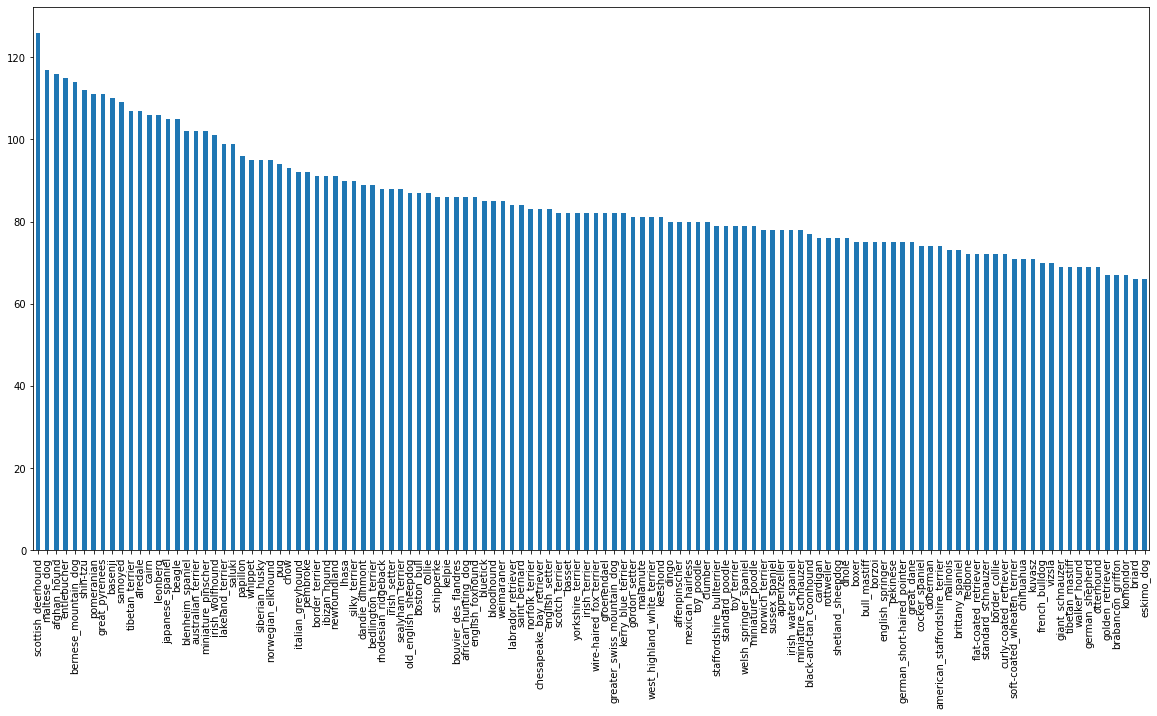

In [14]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,10))

In [11]:
labels_csv["breed"].value_counts().median()

82.0

In [0]:
from IPython.display import Image

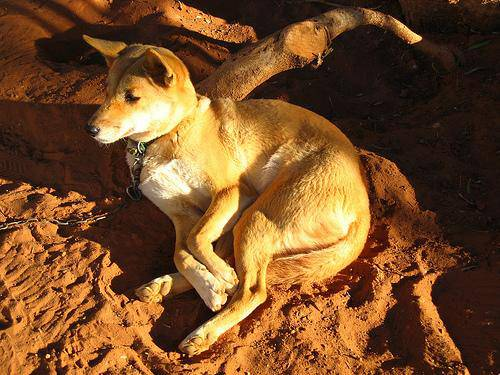

In [17]:
Image("drive/My Drive/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

In [0]:
filename=[]
for i in labels_csv["id"]:
  filename.append("drive/My Drive/Dog Vision/dog-breed-identification/train/"+i+".jpg")

In [18]:
filename[:10]

['drive/My Drive/Dog Vision/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [20]:
len(filename)

10222

In [0]:
import os

In [22]:
len(os.listdir("drive/My Drive/Dog Vision/dog-breed-identification/train/"))

10244

In [21]:
os.listdir("drive/My Drive/Dog Vision/dog-breed-identification/train/")[:10]

['e297c765ac7e6c1d7c4657c7e72b1544.jpg',
 'e5fe6ce882c440a45354722376fdb770.jpg',
 'e316925eb1cf7cdeb1ffaab7424e231d.jpg',
 'dee5db7f0834ca1db80615a9d5fb6334.jpg',
 'e65087fe4a5ef4495d30e454f281b06f.jpg',
 'e073b458a33cbfe9b733764a1246f52e.jpg',
 'e1fa947ecb1ca186470952a971376bc6.jpg',
 'dcda81d6b22e37e4c0fc36a383a61e73.jpg',
 'e17462ffe48dffec8ff70325a6047957.jpg',
 'e0f1273a2ed4e1790bd92880d0651893.jpg']

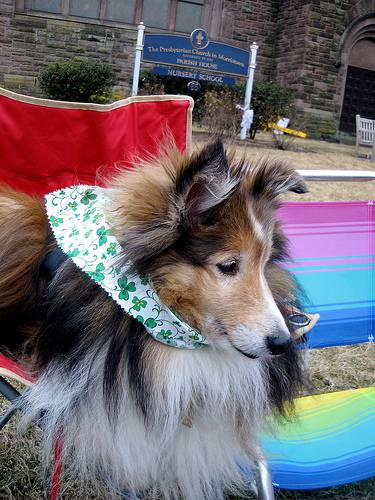

In [23]:
Image(filename[10])

In [25]:
labels_csv["breed"][10]

'shetland_sheepdog'

In [24]:
labels=np.array(labels_csv["breed"])
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [26]:
len(labels)

10222

In [0]:
unique_breeds=np.unique(labels)

In [29]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [30]:
len(unique_breeds)

120

In [31]:
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [0]:
boolean_labels=[]
for i in range(len(labels)):
  
  boolean_labels.append(labels[i]==unique_breeds)



In [33]:
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [34]:
len(boolean_labels)

10222

In [35]:
print(labels[0])
print(np.where(labels[0]==unique_breeds))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [0]:
x=filename
y=boolean_labels

In [0]:
NUM_IMAGES=1000 #@param{type:"slider",min:1000,max:10000,step:1000}

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,
                                              random_state=42)

In [39]:
len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [40]:
x_train[:5]

['drive/My Drive/Dog Vision/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
 'drive/My Drive/Dog Vision/dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg']

In [41]:
y_train[:2]
        

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

Preprocessing Image


In [0]:
from matplotlib.pyplot import imread
image=imread(filename[100])

In [43]:
image.shape


(500, 500, 3)

In [44]:
image

array([[[  1,   0,   0],
        [ 26,  25,  23],
        [  1,   0,   0],
        ...,
        [  0,   0,   0],
        [ 10,  10,   8],
        [  7,   7,   5]],

       [[  1,   0,   0],
        [ 11,  10,   8],
        [ 15,  14,  12],
        ...,
        [ 15,  15,  13],
        [  0,   0,   0],
        [  9,   9,   7]],

       [[  1,   0,   0],
        [ 29,  28,  26],
        [166, 165, 163],
        ...,
        [158, 158, 156],
        [ 11,  11,   9],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   5],
        [  7,   6,  12],
        [135, 134, 140],
        ...,
        [ 18,  18,  18],
        [  4,   4,   4],
        [  0,   0,   0]],

       [[ 15,  14,  20],
        [  1,   0,   6],
        [ 21,  20,  26],
        ...,
        [  3,   3,   3],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   5],
        [  2,   1,   7],
        [  0,   0,   5],
        ...,
        [  0,   0,   0],
        [  2,   2,   2],
        [  4,   4,   4]]

In [45]:
image.max()

255

In [46]:
image.min()

0

In [47]:
image[:2]

array([[[ 1,  0,  0],
        [26, 25, 23],
        [ 1,  0,  0],
        ...,
        [ 0,  0,  0],
        [10, 10,  8],
        [ 7,  7,  5]],

       [[ 1,  0,  0],
        [11, 10,  8],
        [15, 14, 12],
        ...,
        [15, 15, 13],
        [ 0,  0,  0],
        [ 9,  9,  7]]], dtype=uint8)

In [48]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 1,  0,  0],
        [26, 25, 23],
        [ 1,  0,  0],
        ...,
        [ 0,  0,  0],
        [10, 10,  8],
        [ 7,  7,  5]],

       [[ 1,  0,  0],
        [11, 10,  8],
        [15, 14, 12],
        ...,
        [15, 15, 13],
        [ 0,  0,  0],
        [ 9,  9,  7]]], dtype=uint8)>

In [49]:
test=tf.io.read_file(filename[10])
test

<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [0]:
test=tf.image.decode_jpeg(test,channels=3)

In [51]:
tf.image.convert_image_dtype(test,tf.float32)

<tf.Tensor: shape=(500, 375, 3), dtype=float32, numpy=
array([[[0.43137258, 0.39607847, 0.4156863 ],
        [0.4666667 , 0.43137258, 0.45098042],
        [0.43921572, 0.4039216 , 0.42352945],
        ...,
        [0.28627452, 0.26666668, 0.28235295],
        [0.30588236, 0.28627452, 0.3019608 ],
        [0.28627452, 0.26666668, 0.28235295]],

       [[0.38431376, 0.34901962, 0.36862746],
        [0.43529415, 0.40000004, 0.41960788],
        [0.427451  , 0.3921569 , 0.41176474],
        ...,
        [0.2784314 , 0.25882354, 0.27450982],
        [0.29803923, 0.2784314 , 0.29411766],
        [0.28235295, 0.2627451 , 0.2784314 ]],

       [[0.32156864, 0.28627452, 0.30588236],
        [0.34901962, 0.3137255 , 0.33333334],
        [0.3254902 , 0.2901961 , 0.30980393],
        ...,
        [0.2784314 , 0.25490198, 0.2627451 ],
        [0.2901961 , 0.26666668, 0.27450982],
        [0.27450982, 0.2509804 , 0.25882354]],

       ...,

       [[0.10588236, 0.10588236, 0.07450981],
        [0.07

In [0]:
IMG_SIZE=224
def process_image(image_path,img_size=IMG_SIZE):
  #Read the image file
  image=tf.io.read_file(image_path)
  #Convert jpeg into tensor with 3 colour channels
  image=tf.image.decode_jpeg(image,channels=3)
  #Convert colour channel values from 0-255 to 0-1
  image=tf.image.convert_image_dtype(image,tf.float32)
  #Resize image to desired shape of (224,224)
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])

  return image

Turning into Batches

In [0]:
def get_image_label(image_path,label):
  image= process_image(image_path)
  return image,label

In [54]:
(process_image(x[10]),tf.constant(y[10]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.41753423, 0.38224012, 0.40184796],
         [0.4316044 , 0.39631027, 0.4159181 ],
         [0.40602714, 0.37879497, 0.3957155 ],
         ...,
         [0.19028023, 0.17067239, 0.18635866],
         [0.28062278, 0.26101494, 0.2767012 ],
         [0.28965282, 0.27004498, 0.28573126]],
 
        [[0.36733648, 0.33204237, 0.3516502 ],
         [0.3150591 , 0.27976498, 0.29937282],
         [0.29561085, 0.26837867, 0.2852992 ],
         ...,
         [0.23583163, 0.21230222, 0.22014536],
         [0.2812507 , 0.25772128, 0.2655644 ],
         [0.26320195, 0.23967254, 0.24751568]],
 
        [[0.40703085, 0.3717367 , 0.3907143 ],
         [0.46396694, 0.42867282, 0.4476504 ],
         [0.5020599 , 0.47482777, 0.491118  ],
         ...,
         [0.27574417, 0.24076518, 0.24374136],
         [0.30945447, 0.27447549, 0.27745166],
         [0.25501153, 0.22003253, 0.22300872]],
 
        ...,
 
        [[0.26359692, 0.28712633

In [0]:
BATCH_SIZE=32

def data_batches(x,y=None,valid_data=False,test_data=False):
  if test_data:
    print("Creating test data batches")
    data=tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data_batches=data.map(process_image).batch(BATCH_SIZE)
    return data_batches

  elif valid_data:
    print("Creating valid data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batches=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batches

  else:
    print("Creating train data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    data_batches=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batches

In [56]:
train_data=data_batches(x_train,y_train)
valid_data=data_batches(x_val,y_val,valid_data=True)

Creating train data batches
Creating valid data batches


In [57]:
train_data.element_spec,valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [0]:
import matplotlib.pyplot as plt

def show_25_images(image,label):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image[i])
    plt.title(unique_breeds[label[i].argmax()])
    plt.axis("off")

In [0]:
train_image,train_label=next(train_data.as_numpy_iterator())

In [60]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [61]:
train_image

array([[[[4.71645862e-01, 4.82216507e-01, 2.98427213e-02],
         [4.83804643e-01, 5.08373678e-01, 1.20379411e-01],
         [3.79734337e-01, 4.25497651e-01, 1.41939536e-01],
         ...,
         [2.62600571e-01, 3.44742477e-01, 4.69493568e-02],
         [2.72979975e-01, 3.21870267e-01, 2.19253991e-02],
         [3.42795312e-01, 3.87245595e-01, 8.39892775e-02]],

        [[4.63500589e-01, 4.93406594e-01, 5.43511100e-02],
         [4.86727059e-01, 5.32677650e-01, 1.00065812e-01],
         [3.87133121e-01, 4.62309599e-01, 4.37073112e-02],
         ...,
         [3.46820116e-01, 4.12491769e-01, 1.06310382e-01],
         [2.83976972e-01, 3.54605526e-01, 6.44418001e-02],
         [2.45693818e-01, 3.16352040e-01, 2.61734836e-02]],

        [[4.89769369e-01, 5.35706818e-01, 1.75692305e-01],
         [4.61337537e-01, 5.26827037e-01, 1.05290554e-01],
         [4.52609837e-01, 5.46482384e-01, 5.38912453e-02],
         ...,
         [3.12266827e-01, 3.66853714e-01, 6.42626882e-02],
         [

In [62]:
len(train_image),len(train_label)

(32, 32)

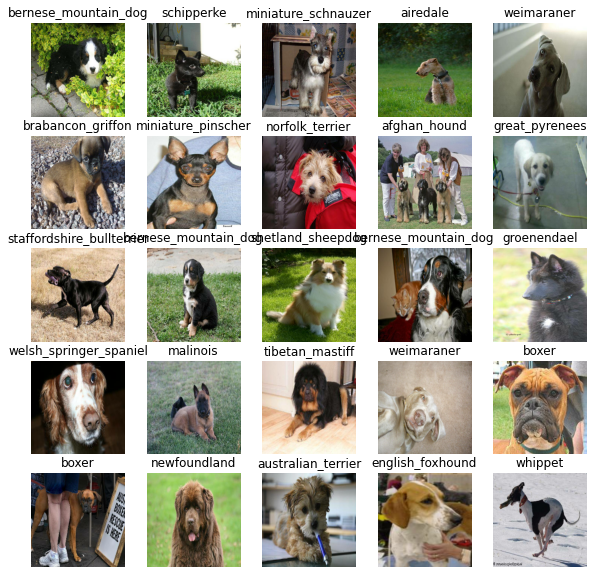

In [63]:
show_25_images(train_image,train_label)

In [0]:
valid_image,valid_label=next(valid_data.as_numpy_iterator())

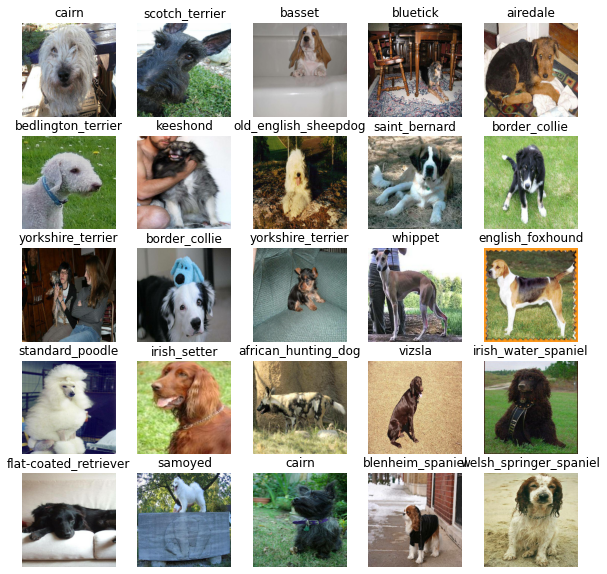

In [65]:
show_25_images(valid_image,valid_label)

# Building Model- URL Model

In [0]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE=len(unique_breeds)
#Importing from TensorflowHub
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

In [0]:
#Create a model with Keras

def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Creating model with:"+MODEL_URL)

  model=tf.keras.Sequential([hub.KerasLayer(MODEL_URL),  #Layer1:Input Layer
  tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax")])#Layer2:Output Layer

  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

  model.build(INPUT_SHAPE)

  return model

In [68]:
model=create_model()
model.summary()

Creating model with:https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [0]:
%load_ext tensorboard

TensorBoard Callback

In [0]:
import datetime

def tensorboard_callback():
  logdir=os.path.join("/content/drive/My Drive/Dog Vision/logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [0]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

Training the model

In [0]:
NUM_EPOCHS=100 #@param {type:"slider",min:10,max:100,step:10}

In [0]:
def train_model():
  model=create_model()
  tensorboard=tensorboard_callback()
  model.fit(x=train_data,epochs=NUM_EPOCHS,callbacks=[tensorboard,early_stopping],validation_data=valid_data,validation_freq=1)
  return model

In [74]:
model=train_model()

Creating model with:https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4
Epoch 1/100
25/25 [==============================] - 429s 17s/step - loss: 4.5461 - accuracy: 0.0887 - val_loss: 3.4724 - val_accuracy: 0.2900
Epoch 2/100
25/25 [==============================] - 4s 179ms/step - loss: 1.6129 - accuracy: 0.7050 - val_loss: 2.1730 - val_accuracy: 0.5000
Epoch 3/100
25/25 [==============================] - 5s 180ms/step - loss: 0.5488 - accuracy: 0.9488 - val_loss: 1.6985 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 4s 179ms/step - loss: 0.2448 - accuracy: 0.9887 - val_loss: 1.5002 - val_accuracy: 0.6450
Epoch 5/100
25/25 [==============================] - 4s 178ms/step - loss: 0.1461 - accuracy: 0.9962 - val_loss: 1.4317 - val_accuracy: 0.6350
Epoch 6/100
25/25 [==============================] - 4s 179ms/step - loss: 0.0997 - accuracy: 1.0000 - val_loss: 1.3851 - val_accuracy: 0.6300
Epoch 7/100
25/25 [==============================]

In [75]:
%tensorboard --logdir /content/drive/My\ Drive/Dog\ Vision/logs

<IPython.core.display.Javascript object>

In [76]:
predict=model.predict(valid_data,verbose=True)
predict

7/7 [==============================] - 1s 113ms/step


array([[1.56479562e-03, 8.91469899e-05, 4.27867199e-04, ...,
        1.10088666e-04, 3.13471210e-05, 2.47999141e-03],
       [2.76391697e-03, 2.89178512e-04, 2.66285483e-02, ...,
        2.99650041e-04, 8.93970137e-04, 9.15892480e-04],
       [1.81797750e-05, 2.87446455e-04, 4.84812044e-05, ...,
        8.08230106e-05, 6.76438503e-05, 1.12592871e-03],
       ...,
       [1.00503494e-05, 6.14092933e-05, 1.69696577e-04, ...,
        3.43815518e-05, 1.04797131e-03, 7.73622196e-06],
       [2.37404695e-03, 1.34337897e-04, 1.11243709e-04, ...,
        4.75711335e-04, 1.89120619e-04, 1.29164374e-02],
       [1.67619393e-04, 2.73114965e-05, 3.15740734e-04, ...,
        8.14074744e-03, 5.30977035e-04, 3.97053576e-04]], dtype=float32)

In [77]:
predict.shape

(200, 120)

In [78]:
predict[0]

array([1.56479562e-03, 8.91469899e-05, 4.27867199e-04, 6.52199669e-05,
       2.47631251e-04, 1.84105102e-05, 1.88026391e-02, 2.83193338e-04,
       1.09359949e-04, 6.73806237e-04, 1.59200674e-04, 5.06736862e-04,
       7.60310446e-04, 5.99910891e-05, 6.27187954e-04, 3.50617780e-03,
       3.70628222e-05, 1.02430657e-01, 7.68866084e-05, 4.82358373e-05,
       1.39432075e-03, 2.48222233e-04, 8.45788509e-06, 2.29286682e-03,
       9.28280788e-05, 1.29248144e-03, 6.29261017e-01, 1.74140805e-04,
       1.20889489e-03, 1.40965183e-03, 1.14191089e-05, 8.39487184e-04,
       5.15143038e-04, 3.56219352e-05, 2.51895050e-04, 1.12526771e-02,
       8.88179841e-07, 3.98124277e-04, 6.17451878e-05, 4.64047189e-05,
       1.67149026e-03, 9.33515366e-06, 1.13728391e-04, 3.76327691e-04,
       6.78459764e-05, 3.28525668e-04, 1.23233156e-04, 2.54674786e-04,
       7.27698556e-04, 7.57757662e-05, 6.13745651e-05, 1.15294451e-05,
       8.67635827e-05, 1.21546931e-04, 1.25108156e-04, 1.51971195e-04,
      

In [79]:
predict[0].sum()

0.99999994

In [80]:
predict[0].shape

(120,)

In [81]:
len(predict[0])

120

In [82]:
predict[0].argmax()

26

In [83]:
unique_breeds[predict[0].argmax()]

'cairn'

In [84]:
predict[0].max()

0.629261

In [85]:
predict[0][26]

0.629261

In [0]:
images_=[]
labels_=[]

for image,label in valid_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

In [87]:
images_[0],labels_[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.2770141 , 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [0]:
def get_pred_label(predict_element):
  return unique_breeds[predict_element.argmax()]

In [89]:
get_pred_label(predict[0])

'cairn'

In [90]:
get_pred_label(labels_[0])

'cairn'

In [0]:
def unbatchify(data):
  images_=[]
  labels_=[]

  for image,label in data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_breeds[np.argmax(label)])
  return images_,labels_

In [0]:
val_images,val_labels=unbatchify(valid_data)

In [93]:
val_images[0]

array([[[0.29599646, 0.43284872, 0.3056691 ],
        [0.26635826, 0.32996926, 0.22846507],
        [0.31428418, 0.2770141 , 0.22934894],
        ...,
        [0.77614343, 0.82320225, 0.8101595 ],
        [0.81291157, 0.8285351 , 0.8406944 ],
        [0.8209297 , 0.8263737 , 0.8423668 ]],

       [[0.2344871 , 0.31603682, 0.19543913],
        [0.3414841 , 0.36560842, 0.27241898],
        [0.45016077, 0.40117094, 0.33964607],
        ...,
        [0.7663987 , 0.8134138 , 0.81350833],
        [0.7304248 , 0.75012016, 0.76590735],
        [0.74518913, 0.76002574, 0.7830809 ]],

       [[0.30157745, 0.3082587 , 0.21018331],
        [0.2905954 , 0.27066195, 0.18401104],
        [0.4138316 , 0.36170745, 0.2964005 ],
        ...,
        [0.79871625, 0.8418535 , 0.8606443 ],
        [0.7957738 , 0.82859945, 0.8605655 ],
        [0.75181633, 0.77904975, 0.8155256 ]],

       ...,

       [[0.9746779 , 0.9878955 , 0.9342279 ],
        [0.99153054, 0.99772066, 0.9427856 ],
        [0.98925114, 0

In [94]:
val_labels[0]

'cairn'

In [0]:
def plot_pred(prediction_probability,images,labels,n=1):
  pred_prob,image,true_label=prediction_probability[n],images[n],labels[n]
  pred_label=get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  if pred_label==true_label:
    color="green"
  else:
    color="red"


  plt.title("{} {:2.0f}% {}".format(pred_label,np.max(pred_prob)*100,true_label),color=color)


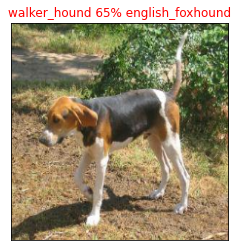

In [96]:
plot_pred(predict,val_images,val_labels,n=42)

In [97]:
predict[0].argsort()[::-1][:10]

array([ 26,  17,  59, 103,  73,   6, 106,  79, 102,  35])

In [98]:
predict[0].argmax()

26

In [0]:

def plot_10_pred(prediction_probability,labels,n=1):
  pred_prob,true_label=prediction_probability[n],labels[n]
  pred_label=get_pred_label(pred_prob)

  top_10_pred_index=pred_prob.argsort()[::-1][:10]
  top_10_pred_values=pred_prob[top_10_pred_index]
  top_10_pred_labels=unique_breeds[top_10_pred_index]

  top_plot=plt.bar(np.arange(10),top_10_pred_values,color="red")
 
  plt.xticks(np.arange(10),labels=top_10_pred_labels,rotation="vertical")

  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(true_label==top_10_pred_labels)].set_color("green")
  else:
    pass


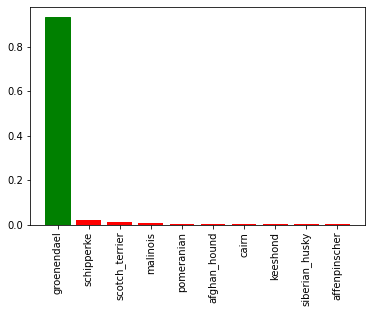

In [100]:
plot_10_pred(predict,val_labels,n=77)

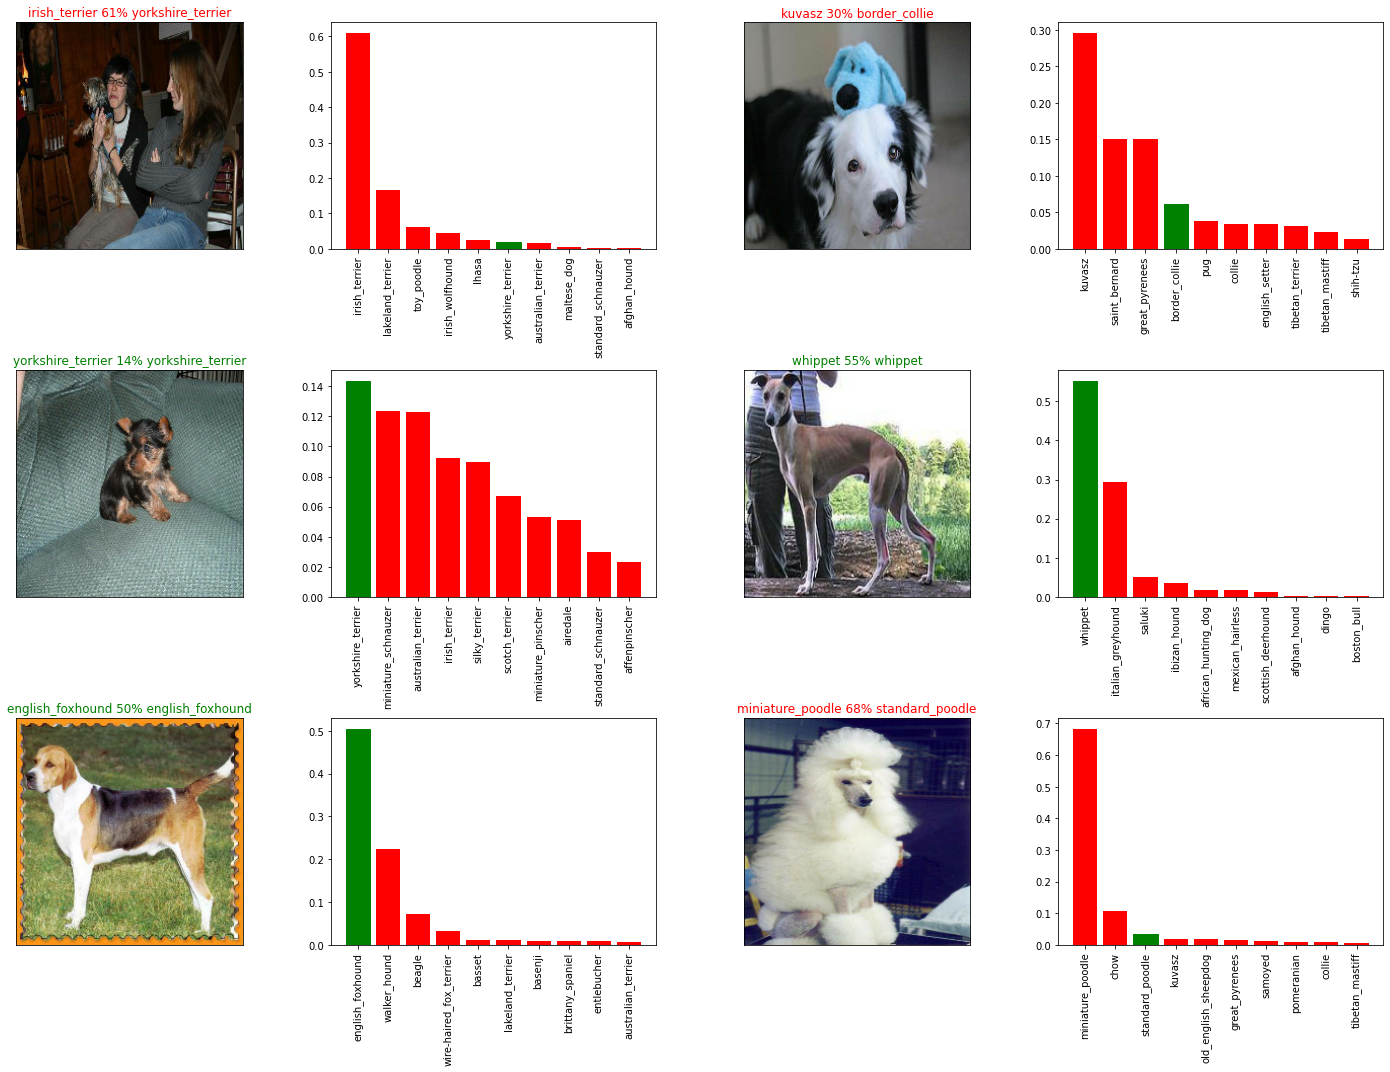

In [101]:
i_multiplier=10
num_rows=3
num_cols=2
num_img=6
plt.figure(figsize=(10*num_cols,5*num_rows))

for i in range(num_img):
  plt.subplot(num_rows,2*num_cols,2*i+1)
  plot_pred(predict,val_images,val_labels,n=i+i_multiplier)
  plt.subplot(num_rows,2*num_cols,2*(i+1))
  plot_10_pred(predict,val_labels,n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

In [102]:
get_pred_label(predict[0])

'cairn'

Saving and Loading model

In [0]:
def save_model(model,suffix=None):
  modeldir=os.path.join("/content/drive/My Drive/Dog Vision/Model", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  model_path=modeldir+"-"+suffix+".h5"
  print(f"Saving model to {model_path}....")
  model.save(model_path)
  return model_path

In [0]:
def load_model(model_path):
  print(f"Loading saved model from {model_path}....")
  model=tf.keras.models.load_model(model_path,custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [105]:
save_model(model,suffix="1000-images-mobilenettv2-Adam")

Saving model to /content/drive/My Drive/Dog Vision/Model/20200522-080852-1000-images-mobilenettv2-Adam.h5....


'/content/drive/My Drive/Dog Vision/Model/20200522-080852-1000-images-mobilenettv2-Adam.h5'

In [106]:
loaded_model=load_model("/content/drive/My Drive/Dog Vision/Model/20200521-191658-1000-images-mobilenettv2-Adam.h5")

Loading saved model from /content/drive/My Drive/Dog Vision/Model/20200521-191658-1000-images-mobilenettv2-Adam.h5....


In [107]:
model.evaluate(valid_data)

7/7 [==============================] - 1s 102ms/step - loss: 1.3552 - accuracy: 0.6450


[1.3552062511444092, 0.6449999809265137]

In [108]:
loaded_model.evaluate(valid_data)

7/7 [==============================] - 1s 106ms/step - loss: 1.2864 - accuracy: 0.6800


[1.2864452600479126, 0.6800000071525574]

Training on full dataset

In [109]:
len(x),len(y)

(10222, 10222)

In [110]:
full_data=data_batches(x,y)

Creating train data batches


In [111]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [112]:
full_model=create_model()

Creating model with:https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


In [0]:
full_model_tensorboard=tensorboard_callback()
full_model_earlystopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [0]:
#full_model.fit(full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard,full_model_earlystopping])

In [0]:
#save_model(full_model,suffix="full-images-mobilenettv2-Adam")

In [116]:
loaded_full_model=load_model("/content/drive/My Drive/Dog Vision/Model/20200521-210859-full-images-mobilenettv2-Adam.h5")

Loading saved model from /content/drive/My Drive/Dog Vision/Model/20200521-210859-full-images-mobilenettv2-Adam.h5....


Making predictions on test dataset

In [118]:
test_path="/content/drive/My Drive/Dog Vision/dog-breed-identification/test/"
test_filenames=[]
for fname in os.listdir(test_path):
  test_filenames.append(test_path +fname)
  
test_filenames[:10]

['/content/drive/My Drive/Dog Vision/dog-breed-identification/test/595154835588f33db23c38a1185a4a5d.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/59450165c5fb8bf1a9308a1a3c5699ba.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/59552e7263ff462d1695a7ab25cef0dc.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/597dce43c7e35d50060bf5e03c6bf392.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/59791221b00f22a42082cb2e6e041ba2.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/598584a8faaf2106d2b36a10fce47b83.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/598816a4249ee9e17e286f8040e016f4.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/599023893bc3656005623501aac7f3d5.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/597e8955786bd704b26aacb35df08a43.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed

In [119]:
test_data=data_batches(x=test_filenames,test_data=True)

Creating test data batches


In [120]:
test_predictions=loaded_full_model.predict(test_data,verbose=1)

326/326 [==============================] - 4843s 15s/step


In [121]:
test_predictions[:5]

array([[1.40468210e-11, 1.68937943e-13, 5.78227188e-11, 4.00426697e-12,
        8.07132494e-07, 9.10569103e-12, 7.56618032e-12, 5.80229831e-12,
        1.31824782e-08, 2.25331157e-10, 2.28272086e-08, 5.12462642e-11,
        7.49175888e-10, 8.95028355e-13, 1.00834792e-12, 5.63631537e-11,
        7.17684647e-13, 5.41653094e-13, 1.75271137e-12, 2.41627845e-07,
        4.69152384e-10, 4.37810703e-13, 2.51281478e-11, 4.20408760e-12,
        1.55497989e-12, 2.95051809e-12, 5.61340118e-14, 1.91768164e-11,
        5.96800886e-10, 1.25200287e-07, 3.81627889e-13, 6.31977359e-10,
        2.15148992e-11, 5.33737395e-11, 2.04402073e-09, 1.57219355e-12,
        1.08723243e-14, 3.68224740e-08, 5.77570017e-06, 2.27955415e-11,
        6.37974465e-11, 5.46061474e-10, 7.84268223e-12, 5.65556391e-13,
        9.22965593e-10, 7.11151485e-11, 3.41144891e-13, 1.03060597e-06,
        2.41006468e-11, 1.37090589e-10, 6.10548721e-12, 4.53686511e-07,
        1.57103660e-12, 4.86254335e-11, 7.04527203e-13, 2.388515

In [0]:
np.savetxt("/content/drive/My Drive/Dog Vision/testpreds.csv",test_predictions,delimiter=',')

In [123]:
test_predictions.shape

(10425, 120)

In [0]:
test_preds_load=np.loadtxt("/content/drive/My Drive/Dog Vision/testpreds.csv",delimiter=',')

In [126]:
test_preds_load[:2]

array([[1.40468210e-11, 1.68937943e-13, 5.78227188e-11, 4.00426697e-12,
        8.07132494e-07, 9.10569103e-12, 7.56618032e-12, 5.80229831e-12,
        1.31824782e-08, 2.25331157e-10, 2.28272086e-08, 5.12462642e-11,
        7.49175888e-10, 8.95028355e-13, 1.00834792e-12, 5.63631537e-11,
        7.17684647e-13, 5.41653094e-13, 1.75271137e-12, 2.41627845e-07,
        4.69152384e-10, 4.37810703e-13, 2.51281478e-11, 4.20408760e-12,
        1.55497989e-12, 2.95051809e-12, 5.61340118e-14, 1.91768164e-11,
        5.96800886e-10, 1.25200287e-07, 3.81627889e-13, 6.31977359e-10,
        2.15148992e-11, 5.33737395e-11, 2.04402073e-09, 1.57219355e-12,
        1.08723243e-14, 3.68224740e-08, 5.77570017e-06, 2.27955415e-11,
        6.37974465e-11, 5.46061474e-10, 7.84268223e-12, 5.65556391e-13,
        9.22965593e-10, 7.11151485e-11, 3.41144891e-13, 1.03060597e-06,
        2.41006468e-11, 1.37090589e-10, 6.10548721e-12, 4.53686511e-07,
        1.57103660e-12, 4.86254335e-11, 7.04527203e-13, 2.388515

Evaluation

In [127]:
["id"]+list(unique_breeds)

['id',
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenen

In [0]:
preds_df=pd.DataFrame(columns=["id"]+list(unique_breeds))

In [129]:
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [130]:
test_filenames[:5]

['/content/drive/My Drive/Dog Vision/dog-breed-identification/test/595154835588f33db23c38a1185a4a5d.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/59450165c5fb8bf1a9308a1a3c5699ba.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/59552e7263ff462d1695a7ab25cef0dc.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/597dce43c7e35d50060bf5e03c6bf392.jpg',
 '/content/drive/My Drive/Dog Vision/dog-breed-identification/test/59791221b00f22a42082cb2e6e041ba2.jpg']

In [132]:
test_path

'/content/drive/My Drive/Dog Vision/dog-breed-identification/test/'

In [0]:
test_ids=[]
for path in os.listdir(test_path):
  test_ids.append(os.path.splitext(path)[0])

In [141]:
test_ids[:5]

['595154835588f33db23c38a1185a4a5d',
 '59450165c5fb8bf1a9308a1a3c5699ba',
 '59552e7263ff462d1695a7ab25cef0dc',
 '597dce43c7e35d50060bf5e03c6bf392',
 '59791221b00f22a42082cb2e6e041ba2']

In [0]:
preds_df["id"]=test_ids

In [0]:
preds_df[list(unique_breeds)]=test_predictions

In [145]:
preds_df.head()

id  ... yorkshire_terrier
0  595154835588f33db23c38a1185a4a5d  ...       7.00851e-10
1  59450165c5fb8bf1a9308a1a3c5699ba  ...       3.35223e-08
2  59552e7263ff462d1695a7ab25cef0dc  ...       6.89448e-14
3  597dce43c7e35d50060bf5e03c6bf392  ...       2.15911e-05
4  59791221b00f22a42082cb2e6e041ba2  ...        1.9256e-08

[5 rows x 121 columns]

In [0]:
preds_df.to_csv("/content/drive/My Drive/Dog Vision/full model submission.csv",index=False)